# CS5340 Tutorial 1: Basic Probability

Lecturer: Harold Soh

TA: Shashank Rao Marpally

Code generated with assistance from Claude.ai

This notebook is a supplement to Tutorial 1 of CS5340: Uncertainty Modeling in AI



In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, List

In [27]:
def team1_random_strategy() -> Tuple[int, int]:
    """Team 1 picks two different random numbers between 0 and 10 (inclusive)"""
    while True:
        num1 = np.random.randint(0, 11)
        num2 = np.random.randint(0, 11)
        if num1 != num2:
            return (min(num1, num2), max(num1, num2))

def team1_consecutive_strategy() -> Tuple[int, int]:
    """Team 1 picks two consecutive numbers between 0 and 10 (inclusive)"""
    # Pick a random number between 0 and 9 (so the next number can be at most 10)
    num1 = np.random.randint(0, 10)
    return (num1, num1 + 1)

def play_game(team1_strategy: str) -> Tuple[bool, dict]:
    """
    Simulates one game with Team 2's random threshold strategy
    
    Args:
        team1_strategy: Either 'random' or 'consecutive'
    
    Returns:
        win: Whether Team 2 won
        game_info: Dictionary containing game details
    """
    """
    Simulates one game with the given threshold strategy and Team 1 strategy
    
    Args:
        threshold: If first number seen is <= threshold, switch
        team1_strategy: Either 'random' or 'consecutive'
    
    Returns:
        win: Whether Team 2 won
        game_info: Dictionary containing game details
    """
    # Team 1 picks numbers based on their strategy
    if team1_strategy == 'random':
        num1, num2 = team1_random_strategy()
    else:  # consecutive
        num1, num2 = team1_consecutive_strategy()
    
    # Team 2 randomly picks one number to look at first
    first_peek = num1 if np.random.random() < 0.5 else num2
    other_number = num2 if first_peek == num1 else num1
    
    # Team 2 picks a random threshold between 0 and 9
    threshold = np.random.randint(0, 10)  # 0 to 9 inclusive
    # threshold = 5
    # Team 2 decides whether to switch based on threshold strategy
    switched = first_peek <= threshold
    final_choice = other_number if switched else first_peek
    
    # Determine if Team 2 won
    won = final_choice > (num1 if final_choice == num2 else num2)
    
    return won, {
        'num1': num1,
        'num2': num2,
        'gap': num2 - num1,  # Track the gap between numbers
        'first_peek': first_peek,
        'switched': switched,
        'final_choice': final_choice,
        'won': won,
        'team1_strategy': team1_strategy,
        'threshold': threshold
    }

def run_simulation(n_games: int = 10000) -> pd.DataFrame:
    """
    Runs multiple games with both strategies and returns results as a DataFrame
    
    Args:
        n_games: Number of games to simulate per strategy
        threshold: Strategy threshold
    
    Returns:
        DataFrame with game results
    """
    results = []
    # Run games with both strategies
    for strategy in ['random', 'consecutive']:
        for _ in range(n_games):
            won, game_info = play_game(strategy)
            results.append(game_info)
    
    return pd.DataFrame(results)

def analyze_results(df: pd.DataFrame) -> dict:
    """Analyzes simulation results and returns key statistics"""
    stats = {}
    
    # Overall statistics for each strategy
    for strategy in ['random', 'consecutive']:
        strategy_df = df[df['team1_strategy'] == strategy]
        stats[strategy] = {
            'total_games': len(strategy_df),
            'win_rate': strategy_df['won'].mean(),
            'switch_rate': strategy_df['switched'].mean(),
            'win_rate_when_switched': strategy_df[strategy_df['switched']]['won'].mean(),
            'win_rate_when_not_switched': strategy_df[~strategy_df['switched']]['won'].mean(),
            'average_gap': strategy_df['gap'].mean()
        }
    
    return stats

def plot_comparison(df: pd.DataFrame):
    """Creates visualization comparing both strategies"""
    plt.figure(figsize=(4, 3))
    
    # Plot 1: Overall win rates by strategy
    win_rates = [df[df['team1_strategy'] == s]['won'].mean() for s in ['random', 'consecutive']]
    plt.bar(['Random', 'Consecutive'], win_rates)
    plt.title('Team 2 Win Rate by Team 1 Strategy')
    plt.ylim(0, 1)
    


Simulation Results:

Team 1 random strategy:
Total games played: 1000000
Team 2 win rate: 70.00%
Average gap between numbers: 4.00

Team 1 consecutive strategy:
Total games played: 1000000
Team 2 win rate: 54.98%
Average gap between numbers: 1.00


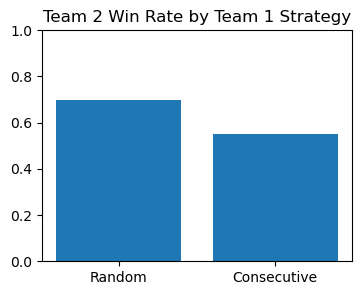

In [28]:
# Run simulation
results_df = run_simulation(n_games=1000000)

# Analyze and display results
stats = analyze_results(results_df)

print("\nSimulation Results:")
for strategy in ['random', 'consecutive']:
    print(f"\nTeam 1 {strategy} strategy:")
    print(f"Total games played: {stats[strategy]['total_games']}")
    print(f"Team 2 win rate: {stats[strategy]['win_rate']:.2%}")
    print(f"Average gap between numbers: {stats[strategy]['average_gap']:.2f}")

# Plot results
plot_comparison(results_df)